<br>

# <center> Missing Numeric Data Handling

<br>

---

<br>

One of the three approaches can be used to handle numerical data -

1.   Correlation
2.   Interpolatiopn
3.   Statistical Estimation

<br>


<br>

## Import Libraries

In [2]:
# importing all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# importing modules from 'mltoolsh' loacal package
# Documentation : https://github.com/Shohrab-Hossain/mltoolsh
import mltoolsh.missingValues as _mv
import mltoolsh.correlation as _corr

<br>

## Dataset Overview

In [3]:
# dataset overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

<br>

### The `'mort_acc'` column will be used in this illustration to handle missing numerical data.


In [4]:
# checking the data type of the column
df['mort_acc'].dtype

dtype('float64')

> comment: The 'mort_acc' column is a numeric column.

In [5]:
# checking how many data are missing in the column 'mort_acc'
_mv.hasMissingValues('mort_acc', df)

This column has 37795 missing values : 9.54 %


> comment: The 'mort_acc' column has 9.54% missing values.

<br>

## 1. Correlation

In [6]:
# creating a copy of the original dataset
df = originalDF.copy()

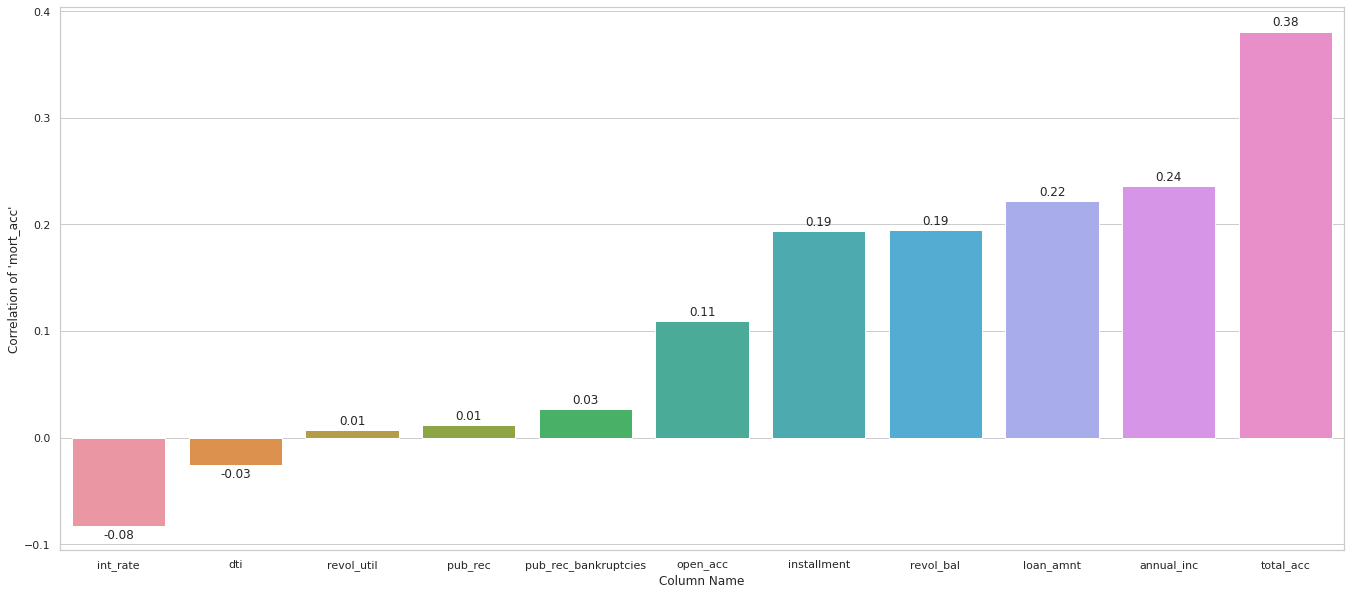

In [7]:
# checking the correlation of 'mort_acc' column with other numeric columns
_corr.checkCorrelation('mort_acc', df, (23,10))

> comment: The column 'mort_acc' and column 'total_acc' have a high correlation of 0.38

In [8]:
# grouping the dataframe by 'total_acc' with aggregation mean()
groupedValue = df.groupby('total_acc').mean()

# taking only the 'mort_acc' column
groupedValue = groupedValue['mort_acc']

# rounding up
groupedValue = round(groupedValue)

In [9]:
# defining the funstion that will fill the misssing values
def filler (item):

  '''
    This function takes each row of the dataframe and separate 'total_acc' and 'mort_acc' columns.
    
    Then checks the 'mort_acc' column's value mortAcc is NaN or not.
    - if NaN 
        returns value from groupedValue Series with the key 'totalAcc'
    - else 
        returns the existing 'mortAcc' value.
  
  '''

  # extracing the value if required columns
  totalAcc = item['total_acc']
  mortAcc = item['mort_acc']

  # checking for missing values
  if np.isnan(mortAcc):
    # if the mort_acc is NaN then filling it with the value totalAcc
    return groupedValue[totalAcc]
  else:
    # if the mort_acc is not NaN then retuning the mortAcc
    return mortAcc

In [10]:
# filling the missing value of column 'mort_acc' with the correlated value from the column 'total_acc' 
df['mort_acc'] = df.apply(filler, axis=1)

In [11]:
# checking the column has any missing values left
_mv.hasMissingValues('mort_acc', df)

This column has no missing value.


comment : The column 'mort_acc' has no missing values. All the missing values are filled with the correlated values.

<br>

## 2. Interpolation

Documentation : [`Pandas interpolate()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.interpolate.html)

In [12]:
# creating a copy of the original dataset
df = originalDF.copy()

In [13]:
# interpolating the column 'mort_acc' using the method 'Pad'
df['mort_acc'].interpolate(method='pad', inplace=True)

In [14]:
# checking the column has any missing values left
_mv.hasMissingValues('mort_acc', df)

This column has no missing value.


comment : The column 'mort_acc' has no missing values. Missing values are filled with exixting values using method='Pad'.

<br>

## 3. Statistical Estimation

Documentation : [`Pandas fillna()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html)

In [15]:
# creating a copy of the original dataset
df = originalDF.copy()

In [16]:
# finding the mean of the column
fillerValue = df['mort_acc'].mean()
fillerValue = round( fillerValue, 2 )

# filling the missing values with mean of the column
df['mort_acc'].fillna(value=fillerValue, inplace=True)

In [17]:
# checking the column has any missing values left
_mv.hasMissingValues('mort_acc', df)

This column has no missing value.


comment : The column 'mort_acc' has no missing values. Missing values are filled with the mean of that column.